<a href="https://colab.research.google.com/github/kaiju8/GANs-Implemented/blob/main/GANs_Simple.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import torch
import torch.nn as nn
import torch.optim as optim

import torchvision
import torchvision.datasets as datasets
import torchvision.transforms as transforms
import torchvision.transforms.functional as F

from torch.utils.data import DataLoader

import numpy as np

import matplotlib.pyplot as plt

In [2]:
class Discriminator(nn.Module):
  def __init__(self, img_dim):
    super().__init__()
    self.disc = nn.Sequential(
        nn.Linear(img_dim, 128),
        nn.LeakyReLU(0.1),
        nn.Linear(128, 1),
        nn.Sigmoid(),
    )
  def forward(self, x):
    return self.disc(x)

class Generator(nn.Module):
  def __init__(self, z_dim, img_dim):
    super().__init__()
    self.gen = nn.Sequential(
        nn.Linear(z_dim, 256),
        nn.LeakyReLU(0.1),
        nn.Linear(256, img_dim),
        nn.Tanh(), 
    )
  def forward(self, x):
    return self.gen(x)

In [3]:
device = "cuda" if torch.cuda.is_available() else "cpu"

GANs are very sensitive to hyperparameters

In [4]:
lr = 3e-4 #vary 
z_dim = 64 #vary
img_dim = 28 * 28 * 1
batch_size = 32
num_epochs = 50

In [5]:
disc = Discriminator(img_dim).to(device)
gen = Generator(z_dim, img_dim).to(device)

In [6]:
train_transforms = transforms.Compose(
    [transforms.ToTensor(), transforms.Normalize((0.5,),(0.5,))]
)
dataset = datasets.MNIST(root = "dataset", transform = train_transforms, download = True)
loader = DataLoader(dataset, batch_size=batch_size, shuffle = True)

In [7]:
opt_disc = optim.Adam(disc.parameters(), lr = lr)
opt_gen = optim.Adam(gen.parameters(), lr = lr)

In [8]:
criterion = nn.BCELoss()

In [9]:
def show(imgs): #Show function from pytorch.org
    if not isinstance(imgs, list):
        imgs = [imgs]
    fig, axs = plt.subplots(ncols=len(imgs), squeeze=False)
    for i, img in enumerate(imgs):
        img = img.detach()
        img = F.to_pil_image(img)
        axs[0, i].imshow(np.asarray(img))
        axs[0, i].set(xticklabels=[], yticklabels=[], xticks=[], yticks=[])

In [10]:
fixed_noise = torch.randn((batch_size, z_dim)).to(device) #For per epoch visualisation

Epoch [0/50] Batch 0/1875 \Loss D: 0.6919, loss G: 0.6856
Epoch [1/50] Batch 0/1875 \Loss D: 0.6616, loss G: 0.8480
Epoch [2/50] Batch 0/1875 \Loss D: 0.2459, loss G: 1.5608
Epoch [3/50] Batch 0/1875 \Loss D: 0.4931, loss G: 1.0561
Epoch [4/50] Batch 0/1875 \Loss D: 0.7381, loss G: 0.8098
Epoch [5/50] Batch 0/1875 \Loss D: 0.6736, loss G: 0.8038
Epoch [6/50] Batch 0/1875 \Loss D: 1.0642, loss G: 0.6292
Epoch [7/50] Batch 0/1875 \Loss D: 0.8307, loss G: 0.6468
Epoch [8/50] Batch 0/1875 \Loss D: 0.6661, loss G: 0.9686
Epoch [9/50] Batch 0/1875 \Loss D: 0.7909, loss G: 0.8050
Epoch [10/50] Batch 0/1875 \Loss D: 0.6060, loss G: 0.8855
Epoch [11/50] Batch 0/1875 \Loss D: 0.6758, loss G: 1.0667
Epoch [12/50] Batch 0/1875 \Loss D: 0.5378, loss G: 1.1116
Epoch [13/50] Batch 0/1875 \Loss D: 0.6597, loss G: 0.7386
Epoch [14/50] Batch 0/1875 \Loss D: 0.4803, loss G: 1.1334
Epoch [15/50] Batch 0/1875 \Loss D: 0.5012, loss G: 1.8103
Epoch [16/50] Batch 0/1875 \Loss D: 0.6122, loss G: 1.2665
Epoch [

<ipython-input-9-b7bad29484c8>:4: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  fig, axs = plt.subplots(ncols=len(imgs), squeeze=False)


Epoch [21/50] Batch 0/1875 \Loss D: 0.6645, loss G: 1.1345
Epoch [22/50] Batch 0/1875 \Loss D: 0.5477, loss G: 1.3991
Epoch [23/50] Batch 0/1875 \Loss D: 0.8119, loss G: 0.8293
Epoch [24/50] Batch 0/1875 \Loss D: 0.8494, loss G: 0.6527
Epoch [25/50] Batch 0/1875 \Loss D: 0.6263, loss G: 1.1719
Epoch [26/50] Batch 0/1875 \Loss D: 0.6136, loss G: 0.9840
Epoch [27/50] Batch 0/1875 \Loss D: 0.6891, loss G: 0.9388
Epoch [28/50] Batch 0/1875 \Loss D: 0.6166, loss G: 1.0765
Epoch [29/50] Batch 0/1875 \Loss D: 0.6056, loss G: 1.3902
Epoch [30/50] Batch 0/1875 \Loss D: 0.6700, loss G: 1.1791
Epoch [31/50] Batch 0/1875 \Loss D: 0.5724, loss G: 1.1320
Epoch [32/50] Batch 0/1875 \Loss D: 0.7430, loss G: 0.8977
Epoch [33/50] Batch 0/1875 \Loss D: 0.7095, loss G: 0.9041
Epoch [34/50] Batch 0/1875 \Loss D: 0.5766, loss G: 1.1656
Epoch [35/50] Batch 0/1875 \Loss D: 0.5801, loss G: 1.1414
Epoch [36/50] Batch 0/1875 \Loss D: 0.4799, loss G: 1.1159
Epoch [37/50] Batch 0/1875 \Loss D: 0.5336, loss G: 1.10

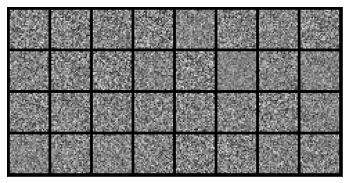

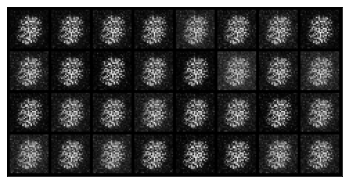

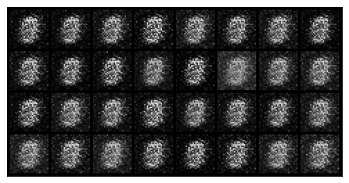

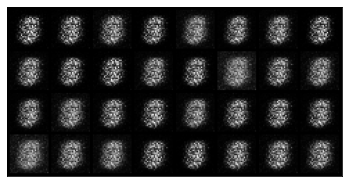

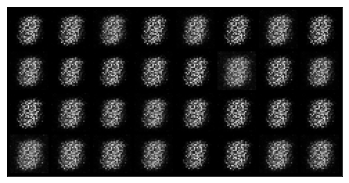

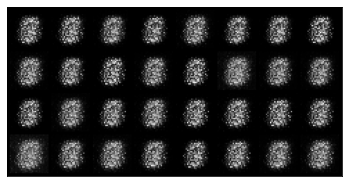

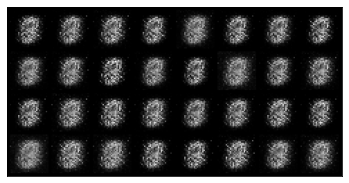

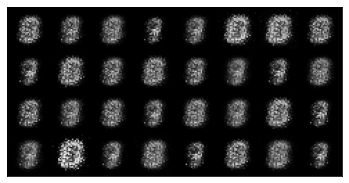

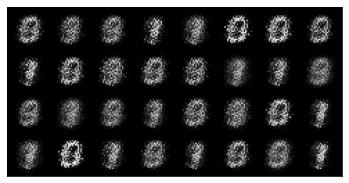

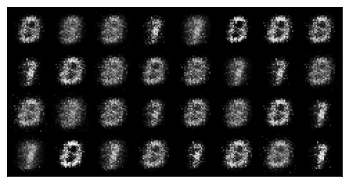

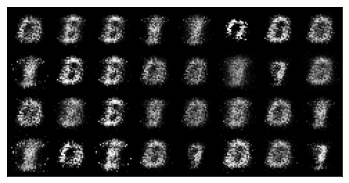

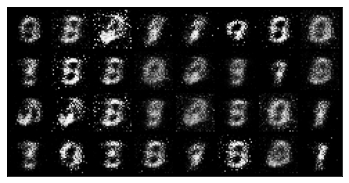

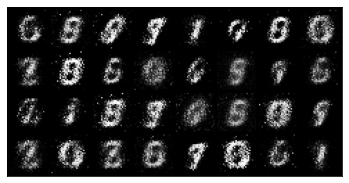

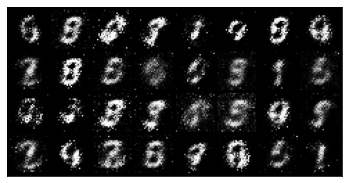

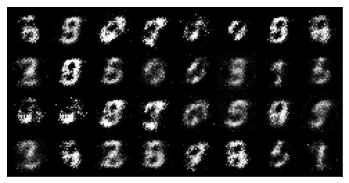

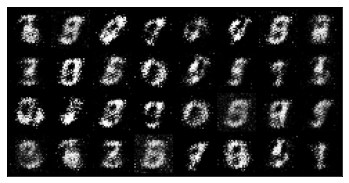

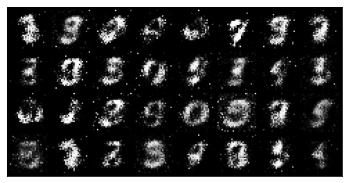

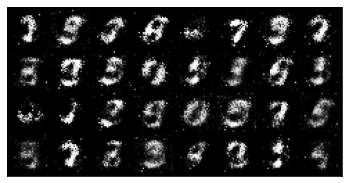

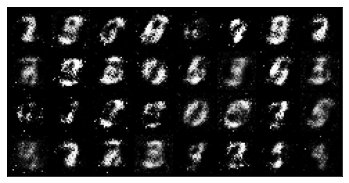

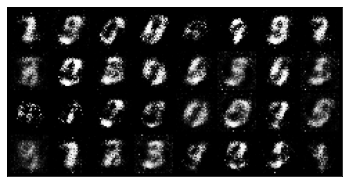

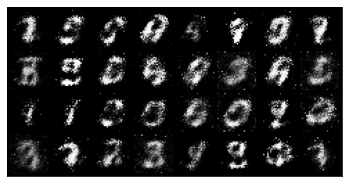

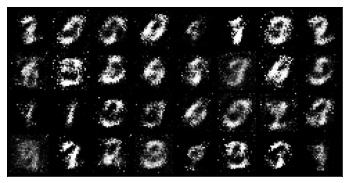

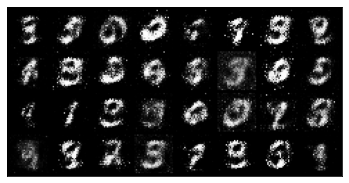

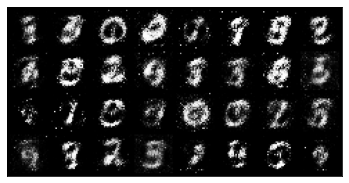

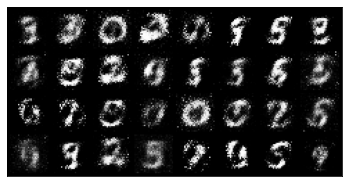

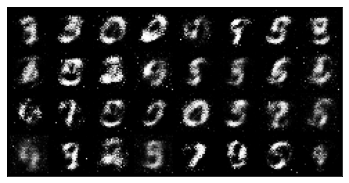

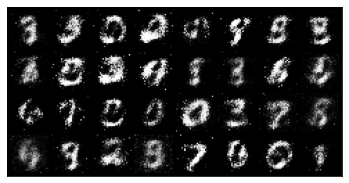

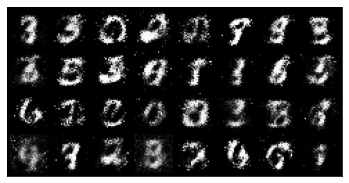

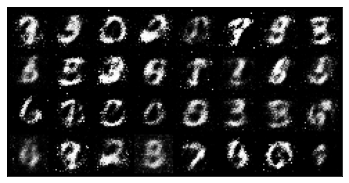

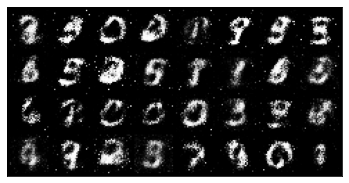

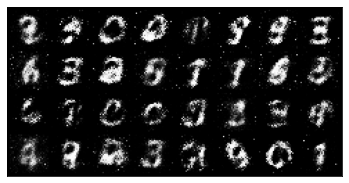

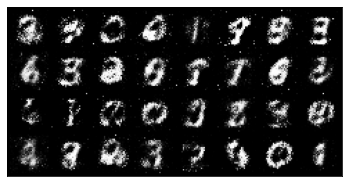

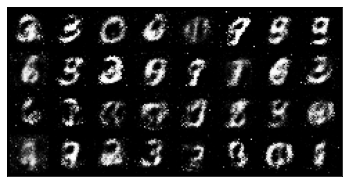

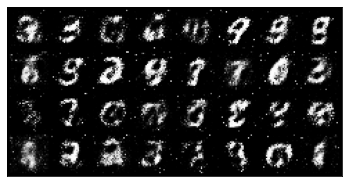

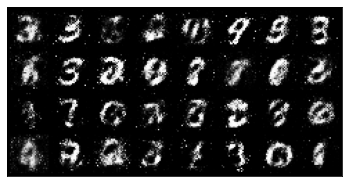

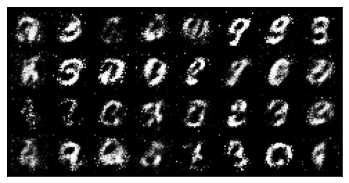

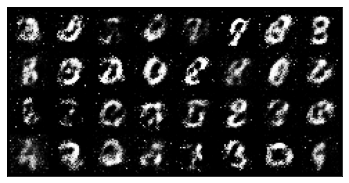

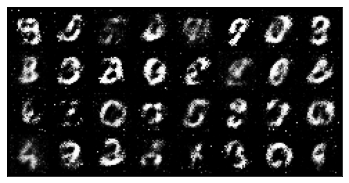

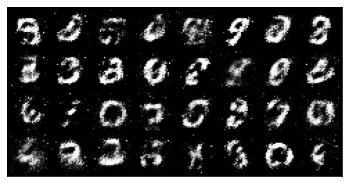

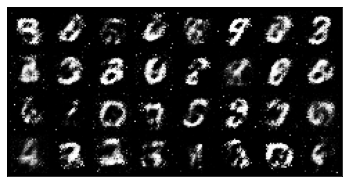

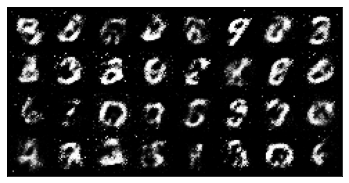

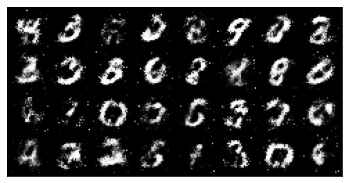

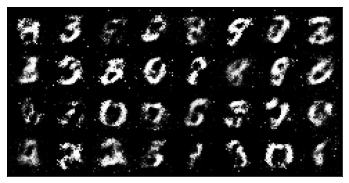

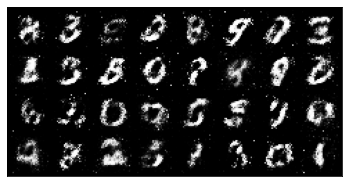

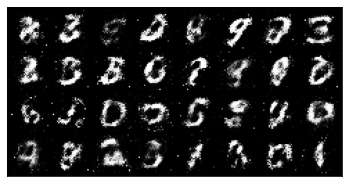

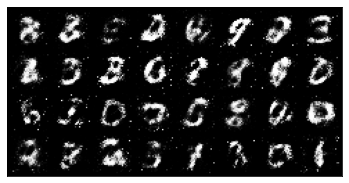

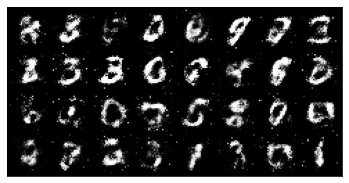

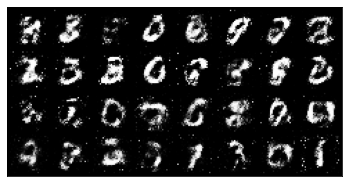

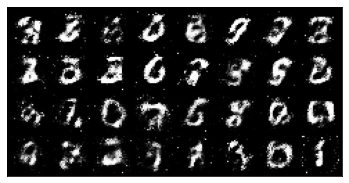

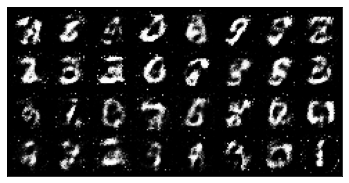

In [11]:
for epoch in range(num_epochs):
  for batch_idx, (real, _) in enumerate(loader):
    real = real.view(-1, 784).to(device)
    batch_Size = real.shape[0]

    #Discriminator max log(D(real)) + log(1 - D(G(z)))

    noise = torch.randn((batch_size, z_dim)).to(device)
    fake = gen(noise)

    disc_real = disc(real).view(-1)
    loss_real = criterion(disc_real, torch.ones_like(disc_real))

    disc_fake = disc(fake).view(-1)# detach for generator stuff or a
    loss_fake = criterion(disc_fake, torch.zeros_like(disc_fake))

    loss_D = (loss_real + loss_fake)/2

    disc.zero_grad()
    loss_D.backward(retain_graph = True)# a
    opt_disc.step()

    #Discriminator min log(1 - D(G(z))) but better to max log(D(G(z)))

    output = disc(fake).view(-1)
    loss_G = criterion(output, torch.ones_like(output))

    gen.zero_grad()
    loss_G.backward(retain_graph = True)# a
    opt_gen.step()


###################################################
    if batch_idx == 0:
            print(f"Epoch [{epoch}/{num_epochs}] Batch {batch_idx}/{len(loader)} \Loss D: {loss_D:.4f}, loss G: {loss_G:.4f}")

            with torch.no_grad():
                fake = gen(fixed_noise).reshape(-1, 1, 28, 28)
                img_grid_fake = torchvision.utils.make_grid(fake, normalize=True)
                show(img_grid_fake)
####################################################